# Read matlab signals

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
!git clone https://github.com/utsb-fmm/FHRMA

Cloning into 'FHRMA'...
remote: Enumerating objects: 1657, done.
remote: Counting objects: 100% (437/437), done.
remote: Compressing objects: 100% (352/352), done.
remote: Total 1657 (delta 87), reused 433 (delta 84), pack-reused 1220 (from 1)
Receiving objects: 100% (1657/1657), 653.23 MiB | 34.73 MiB/s, done.
Resolving deltas: 100% (105/105), done.
Updating files: 100% (1318/1318), done.


In [4]:
!ls FHRMA/FHRMAdataset

analyses  testdata  traindata


In [5]:
os.listdir( 'FHRMA/FHRMAdataset/traindata/')[:4], len(os.listdir( 'FHRMA/FHRMAdataset/traindata/'))

(['train58.fhr', 'train60.fhr', 'train09.fhr', 'train01.fhr'], 66)

In [6]:
os.listdir( 'FHRMA/FHRMAdataset/testdata/')[:4], len(os.listdir( 'FHRMA/FHRMAdataset/testdata/'))

(['test65.fhr', 'test52.fhr', 'test20.fhr', 'test13.fhr'], 90)

# Read expert annotation file convert to df

# Read signals to csv

In [7]:

import os
import numpy as np
import struct



def binary_to_df(file_path):
    # Get the size of the file
    Lfile = os.path.getsize(file_path)

    # Read the binary file
    with open(file_path, "rb") as binary_file:
        data = binary_file.read()

    record_format = 'hhh'  # 2 floats and 1 byte
    record_size = struct.calcsize(record_format)
    #print(record_size, len(data), len(data) // record_size,len(data) / record_size)
    # Calculate the number of records
    num_records = len(data) // record_size

    # Unpack the data
    unpacked_data = [struct.unpack(record_format, data[i*record_size:(i+1)*record_size]) for i in range(num_records)]

    # Convert to a NumPy array
    np_array = np.array(unpacked_data)

    # Convert to a Pandas DataFrame
    df = pd.DataFrame(np_array, columns=['m', 'toco', 'fhr'])
    #print(df.head())
    #print(df.m.sum())
    df=df.iloc[1:][['toco', 'fhr']]
    df['fhr']=(df['fhr'])/4.
    df['toco']=(df['toco'])/2.
    return df


In [8]:
train_dir = 'FHRMA/FHRMAdataset/traindata/'
test_dir = 'FHRMA/FHRMAdataset/testdata/'
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

In [9]:
len(train_files),len(test_files)

(66, 90)

<Axes: title={'center': 'train58.fhr 4Hz'}>

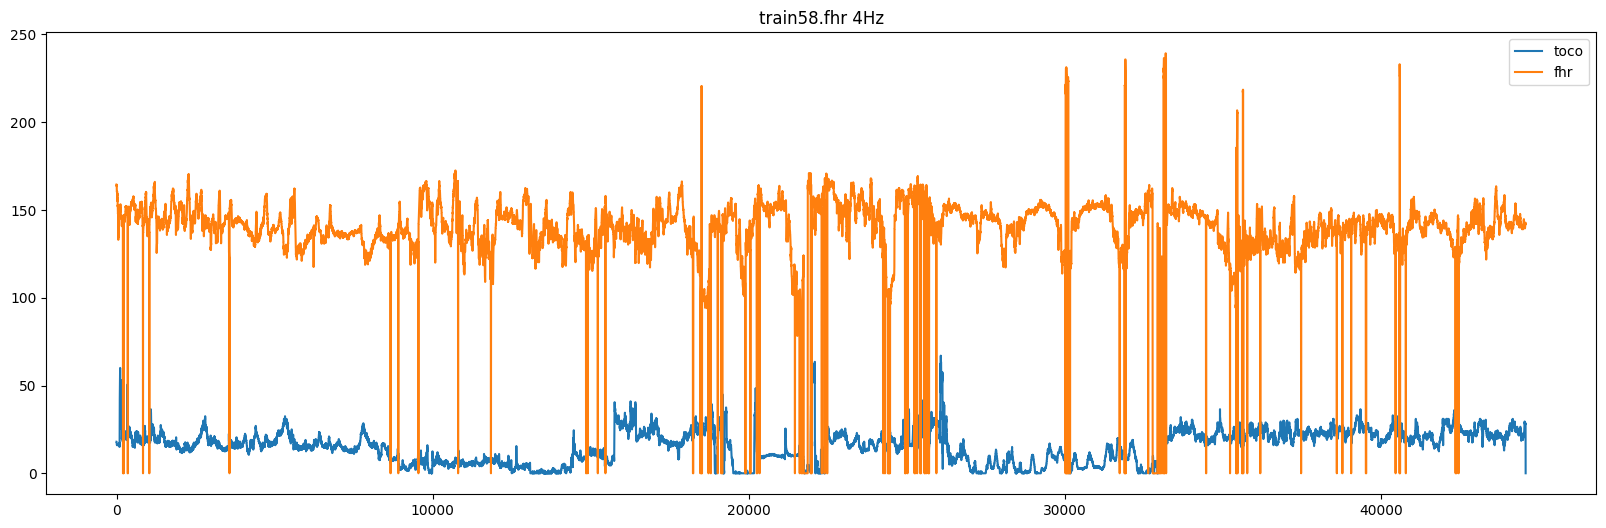

In [10]:
# Define the file path
file_path = os.path.join(train_dir, train_files[0])
df = binary_to_df(file_path)

df.plot(figsize=(20,6), title=train_files[0]+' 4Hz')

<Axes: title={'center': 'train57.fhr 4Hz'}>

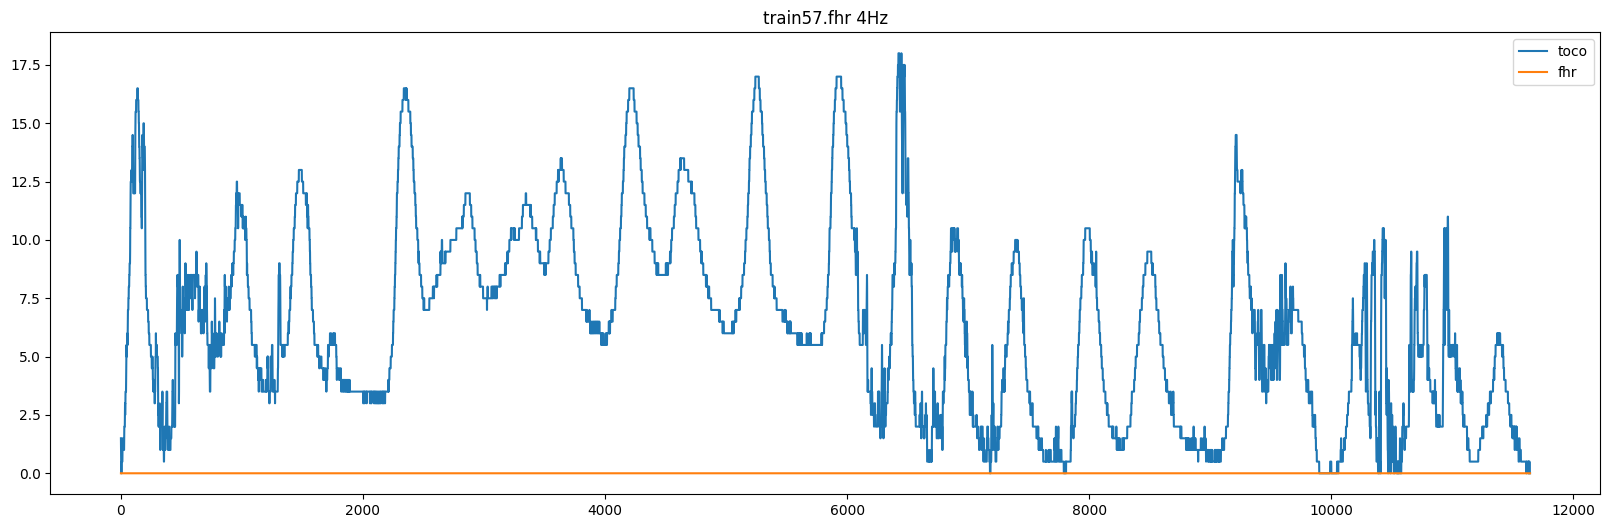

In [11]:
# Define the file path
file_path = os.path.join(train_dir, train_files[10])
df = binary_to_df(file_path)

df.plot(figsize=(20,6), title=train_files[10]+' 4Hz')

<Axes: title={'center': 'train19.fhr 4Hz'}>

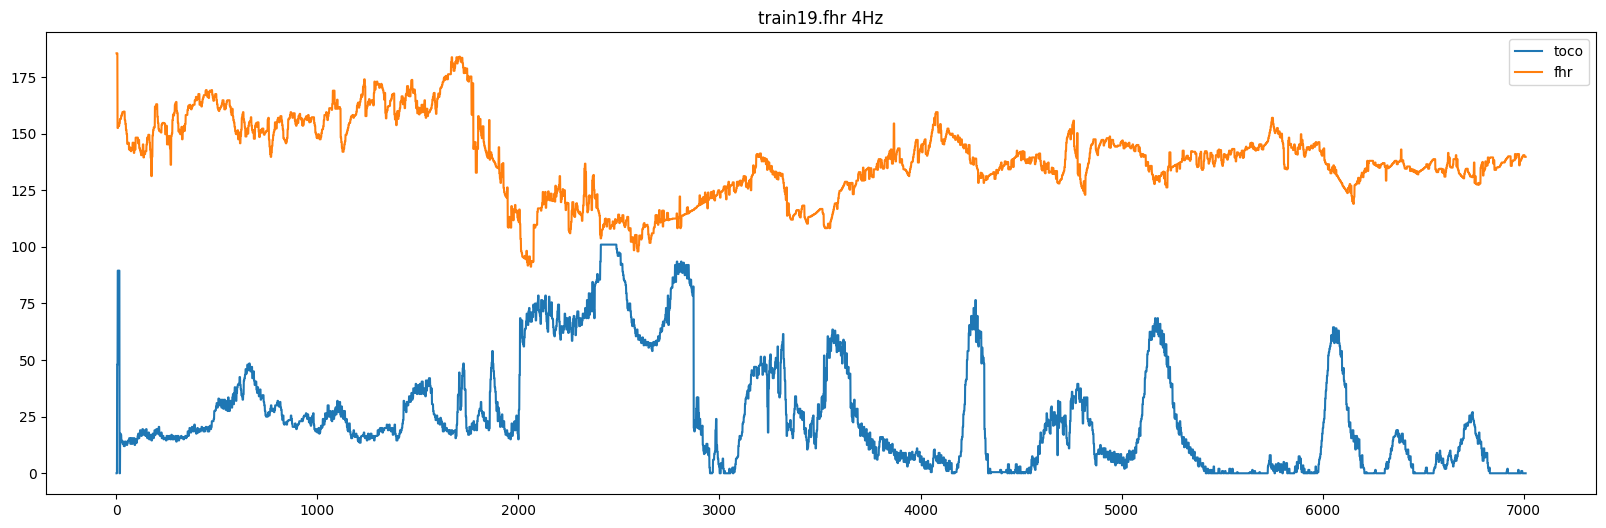

In [12]:
# Define the file path
file_path = os.path.join(train_dir, train_files[20])
df = binary_to_df(file_path)

df.plot(figsize=(20,6), title=train_files[20]+' 4Hz')

In [13]:
!mkdir train_csv

In [14]:
!mkdir test_csv

# Read all fhr in the train and test directory and save to csv

In [15]:

file_info_list=[]
# train
for filename in os.listdir(train_dir):
        file_path = os.path.join(train_dir, filename)

        # Check if it's a file (not a directory)
        if os.path.isfile(file_path):
            # Convert binary file to dataframe
            df = binary_to_df(file_path)

            f=filename.split('.fhr')[0]+'.csv'
            df.to_csv(os.path.join('train_csv', f), index = False)

            # Append information to the list
            file_info_list.append({'pid':f,
                                   'test':0,
                                   'file_name': filename,
                                   'sig_length': len(df),
                                   'fhr_mean':df['fhr'].mean(),
                                   'toco_mean':df['toco'].mean()})

# train
for filename in os.listdir(test_dir):
        file_path = os.path.join(test_dir, filename)

        # Check if it's a file (not a directory)
        if os.path.isfile(file_path):
            # Convert binary file to dataframe
            df = binary_to_df(file_path)

            f=filename.split('.fhr')[0]+'.csv'
            df.to_csv(os.path.join('test_csv', f), index = False)

            # Append information to the list
            file_info_list.append({'pid':f,
                                   'test':1,
                                   'file_name': filename,
                                   'sig_length': len(df),
                                   'fhr_mean':df['fhr'].mean(),
                                   'toco_mean':df['toco'].mean()})


# Create a dynamic dataframe from the list of file information
dynamic_df = pd.DataFrame(file_info_list)
dynamic_df.to_csv('df_fhrma_dataset.csv', index = False)
# Display the dynamic dataframe
dynamic_df.head()


<ipython-input-7-d47444f847df>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fhr']=(df['fhr'])/4.
<ipython-input-7-d47444f847df>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['toco']=(df['toco'])/2.


,pid,test,file_name,sig_length,fhr_mean,toco_mean
0,train58.csv,0,train58.fhr,44563,138.261473,15.333876
1,train60.csv,0,train60.fhr,15877,143.420892,20.056906
2,train09.csv,0,train09.fhr,17591,172.059931,36.158973
3,train01.csv,0,train01.fhr,14006,148.906112,33.752463
4,train10.csv,0,train10.fhr,23450,173.506940,34.735288


In [16]:
f

'test27.csv'

<Axes: >

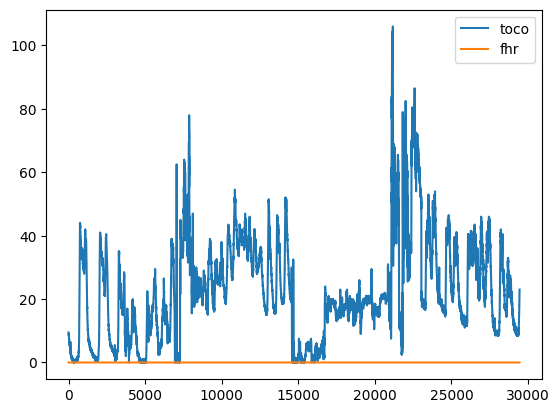

In [17]:
df.plot()

<Axes: title={'center': 'train03   4Hz'}>

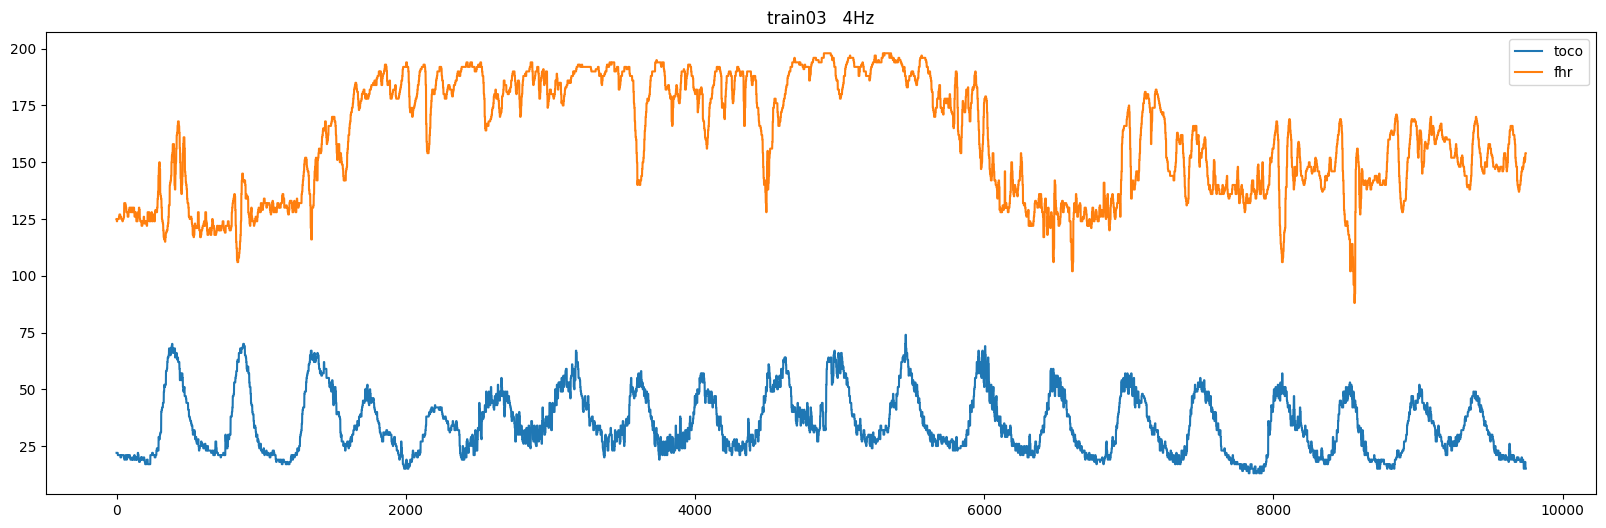

In [18]:
d=pd.read_csv('train_csv/train03.csv')
d.plot(figsize=(20,6), title='train03   4Hz')

## Signal files in test data are raw, no prerocessing

<Axes: title={'center': 'Raw  test83   4Hz'}>

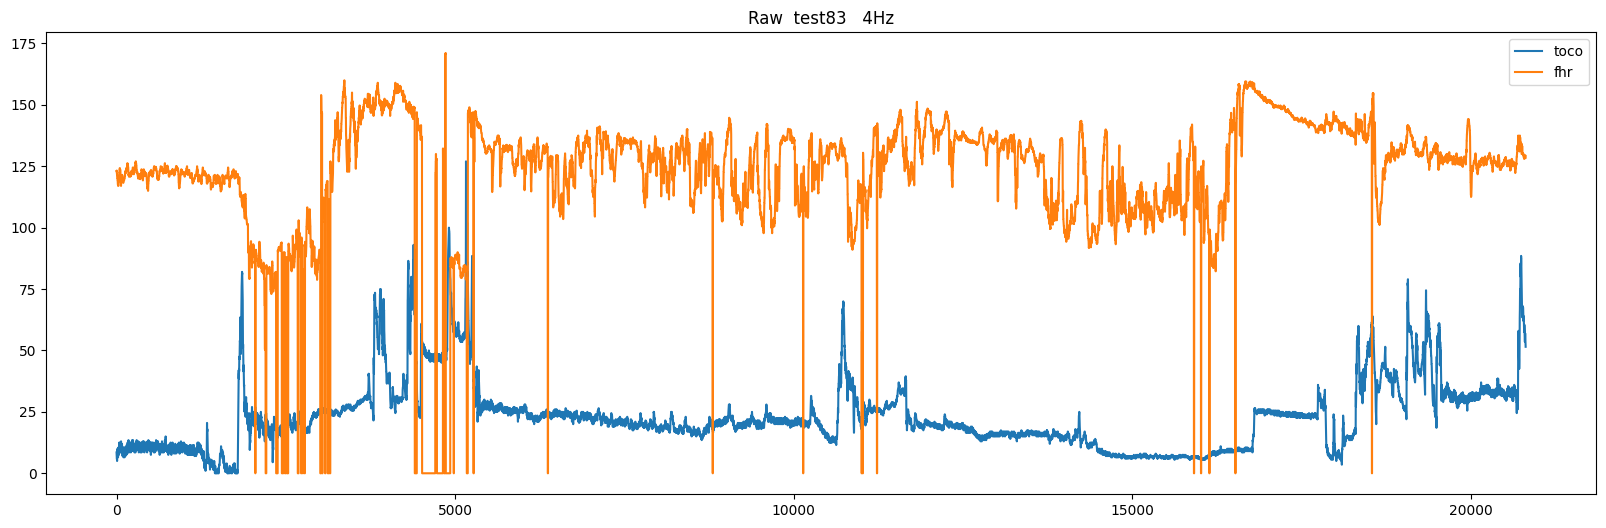

In [19]:
d=pd.read_csv('test_csv/test83.csv')
d.plot(figsize=(20,6), title='Raw  test83   4Hz')

<Axes: >

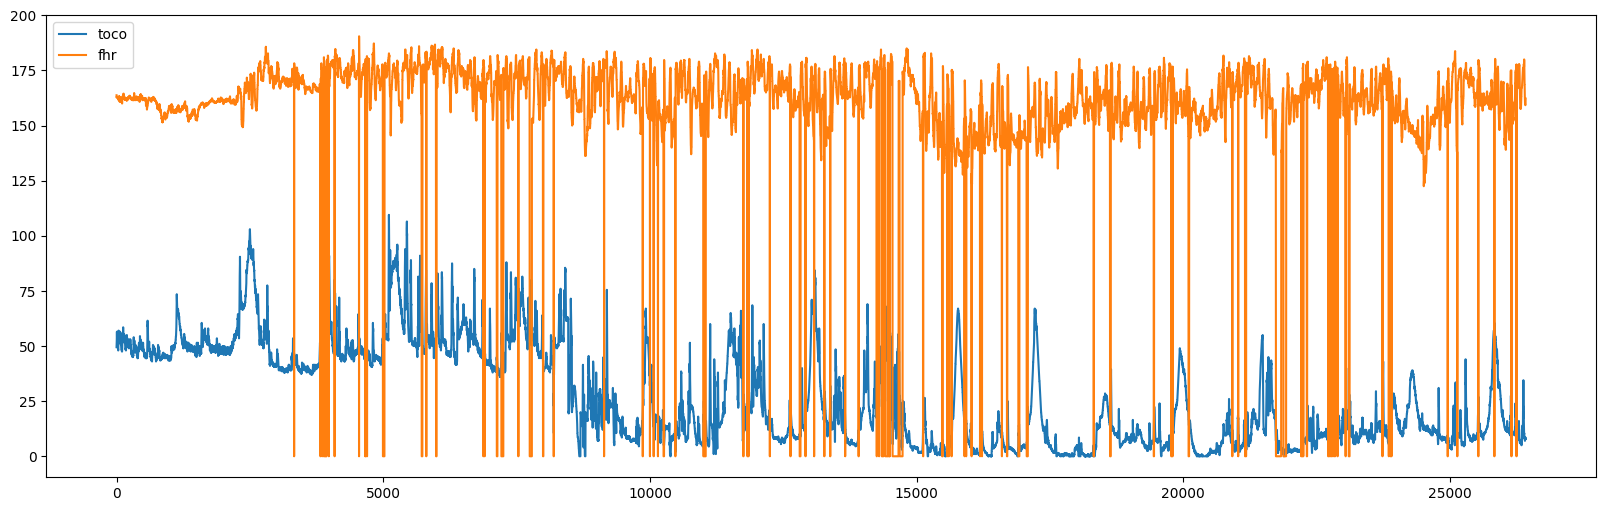

In [20]:
d=pd.read_csv('test_csv/test53.csv')
d.plot(figsize=(20,6))

In [21]:
dynamic_df.head()

,pid,test,file_name,sig_length,fhr_mean,toco_mean
0,train58.csv,0,train58.fhr,44563,138.261473,15.333876
1,train60.csv,0,train60.fhr,15877,143.420892,20.056906
2,train09.csv,0,train09.fhr,17591,172.059931,36.158973
3,train01.csv,0,train01.fhr,14006,148.906112,33.752463
4,train10.csv,0,train10.fhr,23450,173.506940,34.735288


<Axes: ylabel='Frequency'>

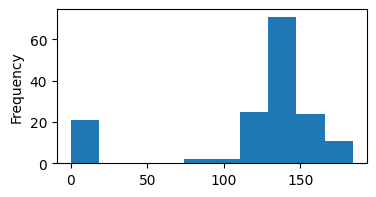

In [22]:
dynamic_df['fhr_mean'].plot(kind='hist', figsize=(4,2))

<Axes: ylabel='Frequency'>

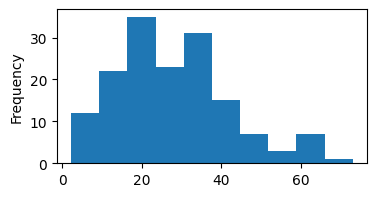

In [23]:
dynamic_df['toco_mean'].plot(kind='hist', figsize=(4,2))

In [24]:
dynamic_df[dynamic_df.fhr_mean<10]

,pid,test,file_name,sig_length,fhr_mean,toco_mean
9,train40.csv,0,train40.fhr,31423,0.000000,7.159406
10,train57.csv,0,train57.fhr,11641,0.000000,6.413281
17,train46.csv,0,train46.fhr,34811,5.815611,18.416765
18,train39.csv,0,train39.fhr,30515,8.736998,12.146567
71,test10.csv,1,test10.fhr,26532,0.000000,5.613806
87,test03.csv,1,test03.fhr,26250,0.000000,40.985962
103,test62.csv,1,test62.fhr,22842,0.000000,26.120261
107,test37.csv,1,test37.fhr,28299,0.000000,11.203929
114,test75.csv,1,test75.fhr,29560,0.000000,63.266661
116,test28.csv,1,test28.fhr,24370,0.000000,22.905519


<Axes: >

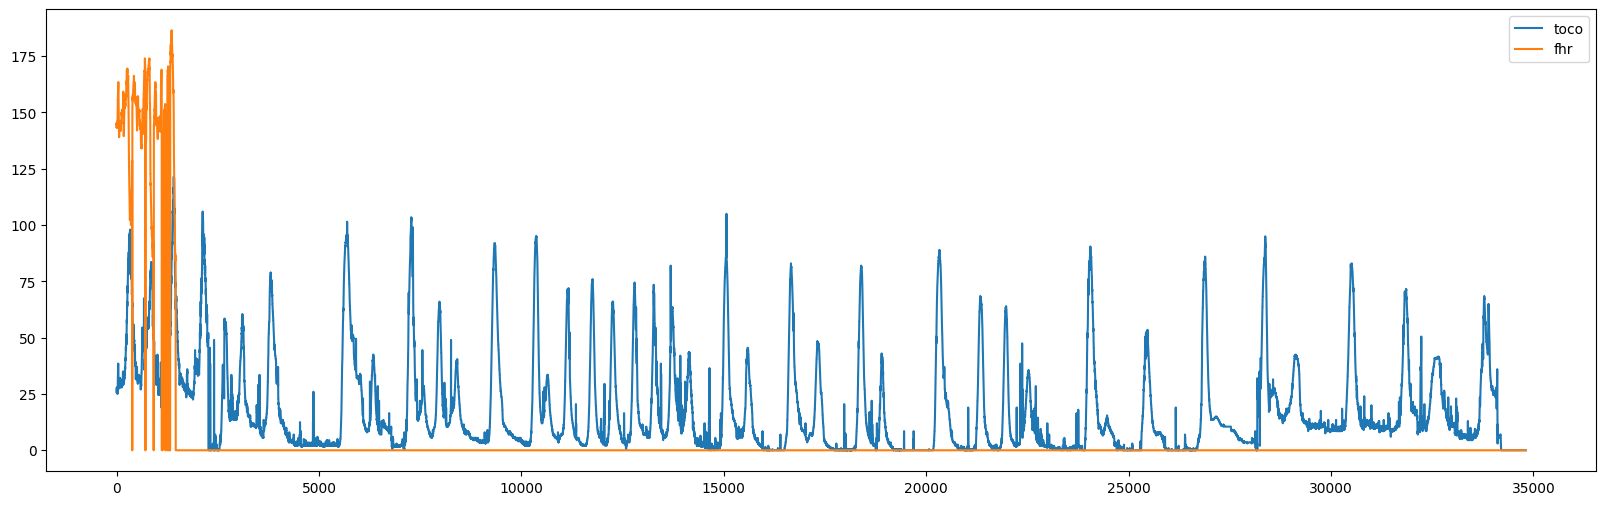

In [25]:
d=pd.read_csv('train_csv/train46.csv')
d.plot(figsize=(20,6))

In [26]:
d.describe()

,toco,fhr
count,34811.000000,34811.000000
mean,18.416765,5.815611
std,21.743468,28.913403
min,0.000000,0.000000
25%,3.000000,0.000000
50%,10.000000,0.000000
75%,26.500000,0.000000
max,121.500000,186.500000


In [27]:
dynamic_df.test.value_counts()

,count
test,
1,90
0,66


In [68]:
dynamic_df.to_csv('df_FHRMA_dataset.csv', index = False)

<Axes: ylabel='Frequency'>

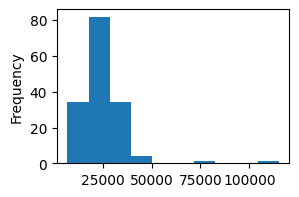

In [34]:
dynamic_df.sig_length.plot(kind='hist', figsize=(3,2))

<Axes: ylabel='Frequency'>

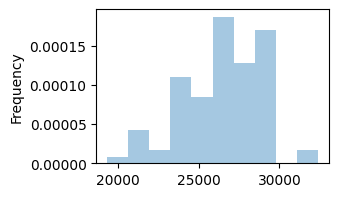

In [40]:
dynamic_df[dynamic_df.test==1].sig_length.plot(kind='hist', figsize=(3,2),alpha=0.4,density=True,label='test')


<Axes: ylabel='Frequency'>

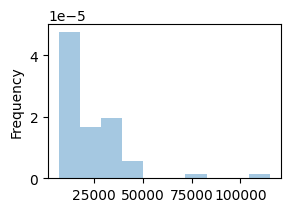

In [41]:
dynamic_df[dynamic_df.test==0].sig_length.plot(kind='hist', figsize=(3,2),density=True,alpha=0.4,label='train')

# Read Expert annotations

In [43]:
import scipy.io

# Load the .mat file
mat = scipy.io.loadmat('FHRMA/FHRMAdataset/analyses/expertAnalyses.mat')
m = mat['data']
m.shape
# Display the keys in the .mat file
print(mat.keys()),m.shape,len(m)

dict_keys(['__header__', '__version__', '__globals__', 'data'])


(None, (1, 156), 1)

## file info for example
0 (1,) - name
1 (2, 40) - the points from wich the base line was made
2 (1, 1) - ??
3 (1, 15546) - baseline
4 (6, 2) - acceleration
5 (10, 2) - deaccelerations
6 (0, 2) -
7 (0, 2)
8 (0, 2)

In [ ]:
for j in range(9):
    print(j,m[0][0][j].shape)

In [44]:
import scipy.io
import pandas as pd

# Load the .mat file
mat_file = scipy.io.loadmat('FHRMA/FHRMAdataset/analyses/expertAnalyses.mat')

# Extract the data
mat = mat_file['data']

In [45]:
# List to store information about each record
info_list = []

# Loop through each record
for i in range(90,156):

    record = np.copy(mat[0][i])
    fname=mat[0][i][0][0]
    f=fname.split('.fhr')[0]

    #print(f, fname,len(mat[0][i][3]))
    # Check if the record has a baseline (non-empty)
    # Check if the record has a baseline (non-empty)

    if len(mat[0][i][3]) > 0:

        info_dict = {
            'pid':f,
            'fname':fname
        }
        # Extract baseline length
        baseline_length = len(mat[0][i][3][0])
        #print(baseline_length)
        # Append baseline to the list
        pd.DataFrame(mat[0][i][3][0],
                     columns=['baseline']).to_csv(os.path.join('train_csv',
                                                          f+'_baseline.csv'), index=False)

        # Extract acceleration and deceleration points
        acceleration_points = []
        if len(mat[0][i][4])>0:
            acceleration_points =mat[0][i][4];
        deceleration_points = mat[0][i][5];

        # Prepare a dictionary to store the information
        info_dict['record_index']= i
        info_dict['baseline_length']=baseline_length
        info_dict['n_dec']=len(deceleration_points)
        info_dict['n_acc']=len(acceleration_points)

        # Add acceleration points to the dictionary
        #print('acc ', len(acceleration_points), '  dec ',len(deceleration_points))

        if len(acceleration_points)>0:

            for j in range(len(acceleration_points)):
                #print(j,f'acc_e{j}',acceleration_points[j, 0],acceleration_points[j, 1])
                info_dict[f'acc_s{j}'] = acceleration_points[j, 0]
                info_dict[f'acc_e{j}'] = acceleration_points[j, 1]

        if len(deceleration_points):
            # Add deceleration points to the dictionary
            for j in range(len(deceleration_points)):
                info_dict[f'dec_s{j}'] = deceleration_points[j, 0]
                info_dict[f'dec_e{j}'] = deceleration_points[j, 1]



    # Append the dictionary to the list

    info_list.append(info_dict);


In [65]:
df_info = pd.DataFrame(info_list)
df_info.to_csv('df_FHRMA_expert_annotation_for_train_data.csv', index=False)

In [47]:

df_info.tail()

,pid,fname,record_index,baseline_length,n_dec,n_acc,dec_s0,dec_e0,dec_s1,dec_e1,...,acc_s36,acc_e36,acc_s37,acc_e37,acc_s38,acc_e38,acc_s39,acc_e39,acc_s40,acc_e40
61,train62,train62.fhr,151,43767,0,25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,train63,train63.fhr,152,15383,1,19,48.670833,49.237500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,train64,train64.fhr,153,15836,0,19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,train65,train65.fhr,154,28767,3,41,54.862349,56.000944,78.998301,79.576095,...,110.690144,111.573829,114.717711,115.278512,115.414464,116.145204,118.116503,118.932213,119.39105,119.747923
65,train66,train66.fhr,155,13324,6,4,13.858573,17.495279,24.326850,28.422394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_info[df_info.columns[:30]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              66 non-null     object 
 1   fname            66 non-null     object 
 2   record_index     66 non-null     int64  
 3   baseline_length  66 non-null     int64  
 4   n_dec            66 non-null     int64  
 5   n_acc            66 non-null     int64  
 6   dec_s0           61 non-null     float64
 7   dec_e0           61 non-null     float64
 8   dec_s1           57 non-null     float64
 9   dec_e1           57 non-null     float64
 10  dec_s2           56 non-null     float64
 11  dec_e2           56 non-null     float64
 12  dec_s3           50 non-null     float64
 13  dec_e3           50 non-null     float64
 14  dec_s4           47 non-null     float64
 15  dec_e4           47 non-null     float64
 16  dec_s5           43 non-null     float64
 17  dec_e5           4

# Visualize Annotations

In [49]:
def dec_to_min(l_idx):
    lm = [(start * 60, end * 60) for start, end in l_idx]
    return lm

In [50]:
def min_to_ind(l_min, frequency=4):
    lm = [(int(start * frequency), int(end * frequency)) for start, end in l_min]
    return lm

In [51]:
# Frequency of the signal in Hz
# frequency = 4  # 4Hz
def dec_to_ind(l_idx, frequency=4):
    print(l_idx)
    lm=dec_to_min(l_idx)
    li=min_to_ind(lm)

    return li

In [52]:
# Frequency of the signal in Hz
# frequency = 4  # 4Hz
def dec_to_ind_pt(l_idx, frequency=4):
    print(l_idx)
    lm= l_idx*60
    li=lm*frequency

    return li

In [53]:
dynamic_df[dynamic_df.test==0].head()

,pid,test,file_name,sig_length,fhr_mean,toco_mean
0,train58.csv,0,train58.fhr,44563,138.261473,15.333876
1,train60.csv,0,train60.fhr,15877,143.420892,20.056906
2,train09.csv,0,train09.fhr,17591,172.059931,36.158973
3,train01.csv,0,train01.fhr,14006,148.906112,33.752463
4,train10.csv,0,train10.fhr,23450,173.506940,34.735288


In [54]:
df_info[df_info.pid=='train04']

,pid,fname,record_index,baseline_length,n_dec,n_acc,dec_s0,dec_e0,dec_s1,dec_e1,...,acc_s36,acc_e36,acc_s37,acc_e37,acc_s38,acc_e38,acc_s39,acc_e39,acc_s40,acc_e40
3,train04,train04.fhr,93,17595,1,17,56.90181,57.474866,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_info[df_info.fname=='train04.fhr']

,pid,fname,record_index,baseline_length,n_dec,n_acc,dec_s0,dec_e0,dec_s1,dec_e1,...,acc_s36,acc_e36,acc_s37,acc_e37,acc_s38,acc_e38,acc_s39,acc_e39,acc_s40,acc_e40
3,train04,train04.fhr,93,17595,1,17,56.90181,57.474866,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_bl = pd.read_csv(os.path.join('train_csv','train04_baseline.csv'))
df_bl.head()

,baseline
0,136.222678
1,136.224827
2,136.226975
3,136.229124
4,136.231273


In [57]:
df_info.head()

,pid,fname,record_index,baseline_length,n_dec,n_acc,dec_s0,dec_e0,dec_s1,dec_e1,...,acc_s36,acc_e36,acc_s37,acc_e37,acc_s38,acc_e38,acc_s39,acc_e39,acc_s40,acc_e40
0,train01,train01.fhr,90,14007,23,0,2.353663,3.050415,4.002077,6.432213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,train02,train02.fhr,91,16149,6,0,10.969600,12.159177,19.534554,20.435234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,train03,train03.fhr,92,9747,3,5,14.884383,15.336796,18.473525,19.287869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,train04,train04.fhr,93,17595,1,17,56.901810,57.474866,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,train05,train05.fhr,94,17460,19,3,15.965823,17.427304,18.236216,18.627077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Lists to store values
acc_values = []
dec_values = []

# Loop through columns and extract values based on column names
for col in df_info.columns:
    if 'acc' in col and col!='n_acc':
        acc_values.append(df_info[df_info.fname=='train04.fhr'][col].values[0])
    elif 'dec' in col and col!='n_dec':

        dec_values.append(df_info[df_info.fname=='train04.fhr'][col].values[0])

acc_values= [x for x in acc_values if not pd.isna(x)]
dec_values= [x for x in dec_values if not pd.isna(x)]

In [59]:
acc_values[0]

4.375944108761331

[(56.90180965147453, 57.47486595174263)]
[(4.375944108761331, 5.310611782477343), (22.032666163142004, 23.56212235649548), (24.054947129909376, 25.074584592145026), (25.567409365558923, 26.24716767371602), (27.878587613293064, 30.07080815709971), (30.376699395770405, 31.039463746223575), (31.324962235649547, 32.76944864048339), (32.95638217522659, 34.80872356495468), (38.258496978851966, 40.56967522658611), (41.198451661631424, 41.98017371601209), (43.63878398791541, 43.99565709969789), (46.092711480362546, 48.18296827794563), (48.386895770392755, 48.74376888217523), (50.969977341389736, 52.958270392749256), (53.17919184290031, 53.51907099697886), (53.63123111782478, 53.9541163141994), (66.89407099697885, 67.38689577039275)]


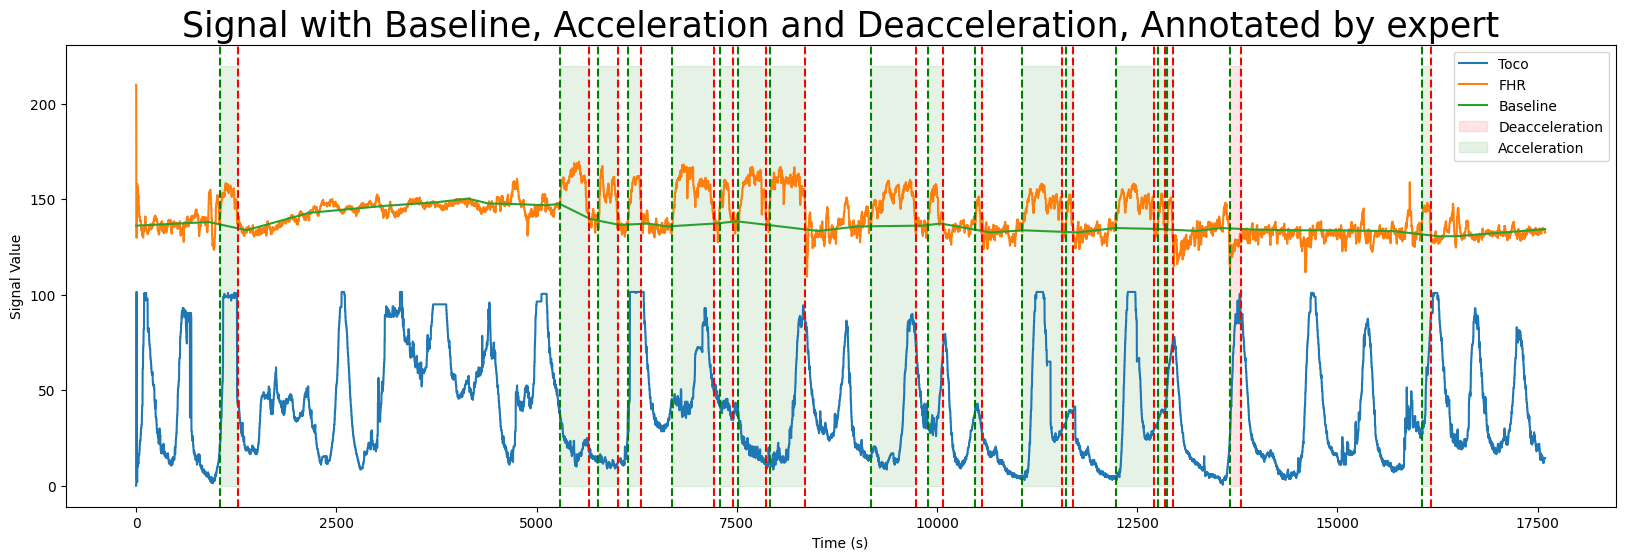

In [60]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv(os.path.join('train_csv','train04.csv'))
df_bl = pd.read_csv(os.path.join('train_csv','train04_baseline.csv'))

# Convert minutes to indices
indices_intervals = dec_to_ind([(dec_values[i], dec_values[i+1]) for i in range(0, len(dec_values), 2)])

# Plot the signal
plt.figure(figsize=(20, 6))
plt.plot(df['toco'], label='Toco')
plt.plot(df['fhr'], label='FHR')
plt.plot(df_bl.values,  label='Baseline')

add_leg=0
# Fill the vertical area between start and end points
for start_idx, end_idx in indices_intervals:
    plt.axvline(x=start_idx, color='g', linestyle='--');
    plt.axvline(x=end_idx, color='r', linestyle='--');
    if add_leg==0:
        plt.fill_betweenx([0,220], start_idx, end_idx, color='red', alpha=0.1,
                          label='Deacceleration')
        add_leg=1
    else:
        plt.fill_betweenx([0,220], start_idx, end_idx, color='red', alpha=0.1)

indices_intervals = dec_to_ind([(acc_values[i], acc_values[i+1]) for i in range(0, len(acc_values), 2)])

# Fill the vertical area between start and end points
add_leg=0
for start_idx, end_idx in indices_intervals:
    plt.axvline(x=start_idx, color='g', linestyle='--')
    plt.axvline(x=end_idx, color='r', linestyle='--')
    if add_leg==0:
        plt.fill_betweenx([0,220], start_idx, end_idx, color='green', alpha=0.1,
                          label='Acceleration')
        add_leg=1
    else:
        plt.fill_betweenx([0,220], start_idx, end_idx, color='green', alpha=0.1)
    #plt.fill_betweenx([0,220], start_idx, end_idx, color='green', alpha=0.1)

plt.xlabel('Time (s)')
plt.ylabel('Signal Value')
plt.title('Signal with Baseline, Acceleration and Deacceleration, Annotated by expert', fontsize=25)

plt.legend()
plt.show()


In [69]:
!ls -l

total 216
-rw-r--r-- 1 root root 10943 Nov 19 05:13 df_
-rw-r--r-- 1 root root 76794 Nov 19 05:33 df_FHEM_expert_annotation_for_train_data.csv
-rw-r--r-- 1 root root 10428 Nov 19 05:13 df_fhrma_dataset.csv
-rw-r--r-- 1 root root 10428 Nov 19 05:42 df_FHRMA_dataset.csv
-rw-r--r-- 1 root root 76794 Nov 19 05:40 df_FHRMA_expert_annotation_for_train_data.csv
-rw-r--r-- 1 root root 10428 Nov 19 05:15 df_FHRM_dataset.csv
drwxr-xr-x 7 root root  4096 Nov 19 05:13 FHRMA
drwxr-xr-x 1 root root  4096 Nov 15 14:19 sample_data
drwxr-xr-x 2 root root  4096 Nov 19 05:13 test_csv
drwxr-xr-x 2 root root  4096 Nov 19 05:33 train_csv


In [67]:
from google.colab import files
files.download('df_FHRMA_expert_annotation_for_train_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
files.download('df_FHRMA_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Original code to understand data structure
```
import scipy.io
import pandas as pd
import numpy as np

# Load the .mat file
#mat = scipy.io.loadmat('your_file.mat')

# Display the keys in the .mat file
print(mat.keys())

# Access the specific variable (assuming 'data' is a key in the .mat file)
data = mat['data']

# Extract and organize the data into a DataFrame
records = []
for record in data:
    filename = record[0][0]
    expertPts = record[1]
    trainingData = record[2]
    baseline = record[3]
    accelerations = record[4]
    decelerations = record[5]
    overshoots = record[6]
    unreliableSignal = record[7]
    notToAnalyse = record[8]
    records.append({
        'filename': filename,
        'expertPts': expertPts,
        'trainingData': trainingData,
        'baseline': baseline,
        'accelerations': accelerations,
        'decelerations': decelerations,
        'overshoots': overshoots,
        'unreliableSignal': unreliableSignal,
        'notToAnalyse': notToAnalyse
    })

df = pd.DataFrame(records)

# Display the first few rows of the DataFrame
df.head()
```